1. このSprintについて  
Sprintの目的  
機械学習の実践的な流れを知る  
高い汎化性能を持つモデルを完成させる  
どのように学ぶか  
丁寧な検証が行える状態にした上で、他者の解法を参考に汎化性能の高いモデル作りを進めます。  

2. 機械学習フロー  
Kaggleの Home Credit Default Risk コンペティションを題材に、機械学習の実践的な流れを学びます。特に適切な 検証 を行い、高い 汎化性能 のあるモデルを完成させることを目指します。  



### 【問題1】クロスバリデーション
事前学習期間では検証用データをはじめに分割しておき、それに対して指標値を計算することで検証を行っていました。  
（ホールドアウト法）しかし、分割の仕方により精度は変化します。実践的には クロスバリデーション（交差検証） を行います。  
分割を複数回行い、それぞれに対して学習と検証を行う方法です。複数回の分割のためにscikit-learnにはKFoldクラスが用意されています。

事前学習期間の課題で作成したベースラインモデルに対してKFoldクラスによるクロスバリデーションを行うコードを作成し実行してください。



In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [4]:
train = pd.read_csv("application_train.csv")
test = pd.read_csv('application_test.csv')
pd.set_option('display.max_columns', 122)

In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.000290,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.000000,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [8]:
data_1 = train[train.TARGET == 1]
data_0 = train[train.TARGET == 0]

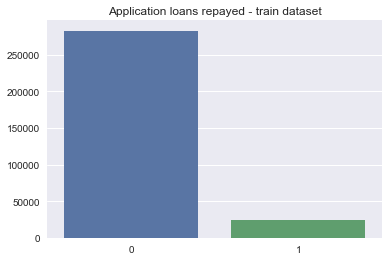

In [9]:
target_dist = train.TARGET.value_counts()#train.TARGET内の数を数える
plt.title('Application loans repayed - train dataset')
sns.barplot(x=target_dist.index, y=target_dist.values);

In [10]:
y = train.loc[: , "TARGET"]
x0 = train.loc[: , ["EXT_SOURCE_1", "EXT_SOURCE_2","EXT_SOURCE_3" , "DAYS_BIRTH"]]
X1 = pd.concat([x0 , y] , axis = 1)
X1 = X1.dropna(how = "any")
X = X1.iloc[: , :4].values
y = X1.iloc[: , 4].values

In [11]:
#クロスバリデーション
from sklearn.model_selection import KFold
kf_5 = KFold(n_splits = 5 , random_state=None, shuffle=False)
kf_5.get_n_splits(X)
for train_index , test_index in kf_5.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train , X_test = X[train_index] , X[test_index]
    y_train , y_test = y[train_index] , y[test_index]

TRAIN: [ 21918  21919  21920 ... 109586 109587 109588] TEST: [    0     1     2 ... 21915 21916 21917]
TRAIN: [     0      1      2 ... 109586 109587 109588] TEST: [21918 21919 21920 ... 43833 43834 43835]
TRAIN: [     0      1      2 ... 109586 109587 109588] TEST: [43836 43837 43838 ... 65751 65752 65753]
TRAIN: [     0      1      2 ... 109586 109587 109588] TEST: [65754 65755 65756 ... 87669 87670 87671]
TRAIN: [    0     1     2 ... 87669 87670 87671] TEST: [ 87672  87673  87674 ... 109586 109587 109588]


In [12]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test , y_test))
print(roc_auc_score(y_test , y_pred))

0.9278642149929278
0.5


### 【問題2】グリッドサーチ

In [17]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
parameters = {"C" : [0.1 , 1 , 10 , 100]}
clf = GridSearchCV(estimator = lr , param_grid = parameters , cv = kf_5 , scoring = "roc_auc")
clf.fit(X , y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [18]:
clf.best_score_

0.574610112712354

In [19]:
clf.best_params_

{'C': 0.1}

### 【問題3】Kernelからの調査
KaggleのKernelから様々なアイデアを見つけ出して、列挙してください。
欠損値の補完とLightGBM

### 【問題4】高い汎化性能のモデル作成

In [23]:
y = train.loc[: , "TARGET"]
x0 = train.loc[: , ["EXT_SOURCE_1", "EXT_SOURCE_2","EXT_SOURCE_3" , "DAYS_BIRTH"]]
X1 = pd.concat([x0 , y] , axis = 1)
X = X1.iloc[: , :4]
y = X1.iloc[: , 4].values
X = X.fillna(0).values

In [28]:
from sklearn.model_selection import KFold
kf_5 = KFold(n_splits = 5 , random_state=None, shuffle=False)
kf_5.get_n_splits(X)
for train_index , test_index in kf_5.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train , X_test = X[train_index] , X[test_index]
    y_train , y_test = y[train_index] , y[test_index]

TRAIN: [ 61503  61504  61505 ... 307508 307509 307510] TEST: [    0     1     2 ... 61500 61501 61502]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 61503  61504  61505 ... 123002 123003 123004]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [123005 123006 123007 ... 184504 184505 184506]
TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [184507 184508 184509 ... 246006 246007 246008]
TRAIN: [     0      1      2 ... 246006 246007 246008] TEST: [246009 246010 246011 ... 307508 307509 307510]


In [29]:
#欠損値を補完したロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test , y_test))
print(roc_auc_score(y_test , y_pred))

0.9205879483594029
0.5


In [26]:
#lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lgb_train = lgb.Dataset(data = X_train , label = y_train)
lgb_test = lgb.Dataset(data = X_test , label = y_test)

In [27]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets = lgb_test , early_stopping_rounds = 150, verbose_eval = 200)

/Users/apple/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 150 rounds
[200]	valid_0's auc: 0.72738
[400]	valid_0's auc: 0.728728
[600]	valid_0's auc: 0.728918
Early stopping, best iteration is:
[555]	valid_0's auc: 0.728974
